# Prevendo o Nível de Satisfação dos Clientes do Santander

## Definição do Problema de Negócio

Identificar clientes insatisfeitos no início do relacionamento com o Banco Santander

## Importando pacotes necessários para o código

In [254]:
import pandas as pd #importando o pacote pandas
from sklearn.pipeline import Pipeline #importando Pipeline, para realizar as atividades em ordem
from sklearn.ensemble import ExtraTreesClassifier #importando as Random Forest para Feature Selection
from sklearn.feature_selection import RFE #Eliminação Recursiva
from sklearn.model_selection import GridSearchCV #importando GridSearchCV, para realizar tuning do modelo
import seaborn as sn
import numpy as np

C:\Users\ohbto\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importando arquivo de treino

In [2]:
treino = pd.read_csv("train.csv",header = 0)
#Removendo a coluna ID, pois ela não agrega informação
treino = treino.iloc[:,1:]
treino

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [3]:
#Vendo o nome das colunas
np.sort(treino.columns.tolist())

array(['TARGET', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3',
       'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3',
       'delta_imp_reemb_var13_1y3', 'delta_imp_reemb_var17_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_in_1y3',
       'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_in_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_imp_venta_var44_1y3',
       'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3',
       'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3',
       'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3',
       'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3',
       'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1',
   

## Redução de Dimensionalidade

In [24]:
## Ao todo, temos 370 variáveis a serem consideradas. Dessa forma, faremos uma redução de dimensionalidade
# baseado em uma randomForest para decidir pelas melhores variáveis
n_variaveis = 10

In [25]:
# Random Forest
RandomForest = ExtraTreesClassifier().fit(treino.iloc[:,0:369], treino.iloc[:,369])

C:\Users\ohbto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
#Vamos selecionar as 10 variáveis de maior importância
melhores10_variaveis_RF = np.argsort(RandomForest.feature_importances_)[-n_variaveis:]
treino.columns[melhores10_variaveis_RF]

Index(['num_var45_ult1', 'num_var22_ult3', 'saldo_medio_var5_hace2',
       'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult3',
       'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'var15', 'var38'],
      dtype='object')

In [27]:
treinoRF = treino.iloc[:,np.append(melhores10_variaveis_RF,len(treino.columns)-1)]
treinoRF

,num_var45_ult1,num_var22_ult3,saldo_medio_var5_hace2,num_var45_hace2,num_var45_hace3,num_var45_ult3,saldo_medio_var5_ult3,saldo_medio_var5_hace3,var15,var38,TARGET
0,0,0,0.00,0,0,0,0.00,0.00,23,39205.170000,0
1,0,0,0.00,0,0,0,0.00,88.89,34,49278.030000,0
2,0,0,3.00,0,0,0,2.07,0.18,23,67333.770000,0
3,18,3,186.09,27,3,48,138.84,0.00,37,64007.970000,0
4,0,9,3.00,0,0,0,13501.47,0.30,39,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0.00,0,0,0,0.00,0.00,48,60926.490000,0
76016,9,24,130.65,36,3,48,0.00,0.00,39,118634.520000,0
76017,0,0,3.00,0,0,0,3.00,0.00,23,74028.150000,0
76018,0,0,3.00,0,0,0,2.58,1.74,25,84278.160000,0


## Análise Exploratória dos dados

In [28]:
treinoRF.describe()

,num_var45_ult1,num_var22_ult3,saldo_medio_var5_hace2,num_var45_hace2,num_var45_hace3,num_var45_ult3,saldo_medio_var5_ult3,saldo_medio_var5_hace3,var15,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000
mean,4.363496,3.044238,1579.135311,5.393212,3.894396,13.651105,1048.856447,8.913659e+02,33.212865,1.172358e+05,0.039569
std,14.406485,6.206116,12148.452398,14.496095,10.416821,33.304012,8189.948852,9.888597e+03,12.956486,1.826646e+05,0.194945
min,0.000000,0.000000,-128.370000,0.000000,0.000000,0.000000,-476.070000,-8.040000e+00,5.000000,5.163750e+03,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,23.000000,6.787061e+04,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.730000,9.900000e-01,28.000000,1.064092e+05,0.000000
75%,3.000000,3.000000,90.000000,3.000000,3.000000,12.000000,83.790000,1.221750e+01,40.000000,1.187563e+05,0.000000
max,510.000000,234.000000,812137.260000,342.000000,339.000000,801.000000,544365.570000,1.542339e+06,105.000000,2.203474e+07,1.000000


In [250]:
# Criando uma função que retorna um dataframe de descrição de dados (tal qual a função describe do pacote explore do R)
def explore_describe(df):
    df_out = pd.DataFrame(columns = ['variable','type','na' ,'na_pct' ,'unique','min', 'quat25','median','mean', 'quat75','max','std'])
    df_out['variable'] = df.columns
    df_out['type'] = df.dtypes.values
    df_out['na'] = [len(df[coluna]) - df[coluna].count() for coluna in df.columns]
    df_out['na_pct'] = df_out.na/len(df_out.na)*100
    df_out['unique'] = [len(df[coluna].unique()) for coluna in df.columns]
    df_out['min']  = [min(df[coluna]) if 'int' in str(df[coluna].dtype) or 'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['mean'] = [round(df[coluna].mean(),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['max']  = [max(df[coluna]) if 'int' in str(df[coluna].dtype) or 'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['std'] = [round(df[coluna].std(),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['quat25'] = [round(df[coluna].quantile(0.25),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['quat75'] = [round(df[coluna].quantile(0.75),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['median'] = [round(df[coluna].quantile(0.5),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    return(df_out)


In [251]:
#Explorando as variaveis
explore_describe(treinoRF)

,variable,type,na,na_pct,unique,min,quat25,median,mean,quat75,max,std
0,num_var45_ult1,int64,0,0.0,94,0.00,0.00,0.00,4.36,3.00,510.00,14.41
1,num_var22_ult3,int64,0,0.0,33,0.00,0.00,0.00,3.04,3.00,234.00,6.21
2,saldo_medio_var5_hace2,float64,0,0.0,14486,-128.37,0.00,3.00,1579.14,90.00,812137.26,12148.45
3,num_var45_hace2,int64,0,0.0,85,0.00,0.00,0.00,5.39,3.00,342.00,14.50
4,num_var45_hace3,int64,0,0.0,66,0.00,0.00,0.00,3.89,3.00,339.00,10.42
5,num_var45_ult3,int64,0,0.0,172,0.00,0.00,0.00,13.65,12.00,801.00,33.30
6,saldo_medio_var5_ult3,float64,0,0.0,17330,-476.07,0.00,2.73,1048.86,83.79,544365.57,8189.95
7,saldo_medio_var5_hace3,float64,0,0.0,7787,-8.04,0.00,0.99,891.37,12.22,1542339.36,9888.60
8,var15,int64,0,0.0,100,5.00,23.00,28.00,33.21,40.00,105.00,12.96
9,var38,float64,0,0.0,57736,5163.75,67870.61,106409.16,117235.81,118756.25,22034738.76,182664.60


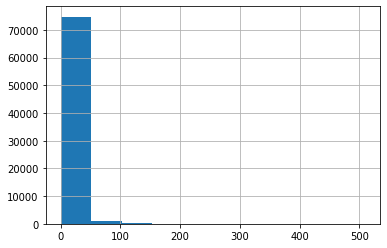

In [253]:
treinoRF.num_var45_ult1.hist()